<AxesSubplot:title={'center':'Chỉ số chất lượng không khí (PM2.5 AQI) \ntại tp.Hà Nội và tp.Hồ Chí Minh\ntừ 03-08-2020 đến 11-08-2020.\nDữ liệu cung cấp bởi aqicn.org\n'}>

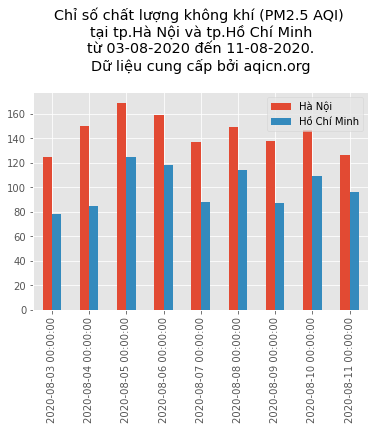

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use("ggplot")

ses = requests.session()
resp_hn  = ses.get("https://api.waqi.info/feed/hanoi/?token=ffefdb043950a61d13f1fa85a72e1bb06f181f2e")
resp_hcm  = ses.get("https://api.waqi.info/feed/ho-chi-minh-city/?token=ffefdb043950a61d13f1fa85a72e1bb06f181f2e")
data_hn = resp_hn.json()
data_hcm = resp_hcm.json()

forecast_hn = data_hn['data']['forecast']['daily']
pm25_hn = forecast_hn['pm25']

forecast_hcm = data_hcm['data']['forecast']['daily']
pm25_hcm = forecast_hcm['pm25']

list_avg_hn = [i['avg'] for i in pm25_hn]
list_avg_hcm = [i['avg'] for i in pm25_hcm]

title = 'Chỉ số chất lượng không khí (PM2.5 AQI) \ntại tp.Hà Nội và tp.Hồ Chí Minh\ntừ 03-08-2020 đến 11-08-2020.\nDữ liệu cung cấp bởi aqicn.org\n'

df = pd.DataFrame([list_avg_hn, list_avg_hcm], index=['Hà Nội', 'Hồ Chí Minh'], columns=pd.date_range(start='2020-08-03',periods=9)).T
df.plot.bar(title=title)